#  Représentation du sens des mots par une approche computationelle, les mots Learning, Association et Memory : Python NLTK Wordnet (modèle symbolique)

Dans un premier temps nous allons regarder les sens de ces trois mots et prendre ceux qui nous semblent les plus pertinents, puis nous allons regarder pour chacun de ces mots lesquels sont les plus proches avant de les comparer entre eux. Pour finir nous verrons comment se placent ces trois mots les uns par rapport aux autres ainsi qu'avec d'autres mots qui leur sont ou ne leur sont pas reliés sémantiquemente dans des graphiques 

## Sens les plus pertinents des mots Learning, Association et Memory

In [19]:
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from math import log



print("Memory : " + wn.synset('memory.n.01').definition())
print("Learning : " +wn.synset('learning.n.01').definition())
print("Association : " +wn.synset('association.n.01').definition())

Memory : something that is remembered
Learning : the cognitive process of acquiring skill or knowledge
Association : a formal organization of people or groups of people


Le premier sens de Learning me semble déjà pertinent cependant il y a certainement des sens plus intéresants dans le cadre de notre recherche pour les 2 autres.

In [6]:
print("Memory : " +wn.synset('memory.n.02').definition())
print("Learning : " +wn.synset('learning.n.01').definition())
print("Association : " +wn.synset('association.n.04').definition())

Memory : the cognitive processes whereby past experience is remembered
Learning : the cognitive process of acquiring skill or knowledge
Association : the process of bringing ideas or events together in memory or imagination


Ces 3 sens me semblent pertinents, de plus rien qu'en lisant ces définitions ces termes peuvent sembler proches.

Maintenant que nous avons des sens pertinents pour nos 3 mots tentons de trouver les termes qui sont proches de ces mots

## Termes les plus proches des mots Learning, Association et Memory

Après plusieurs essais, c'est la wup_similarity qui me semble donner les résultats les plus probants je vais donc comparer les mots avec cette méthode par la suite. Un mot à une wup_similarity entre 0 et 1 et vaut 1 avec lui même.

(Wu-Palmer Similarity: Return a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node). Note that at this time the scores given do _not_ always agree with those given by Pedersen's Perl implementation of Wordnet Similarity.)

Nous allons donc considérer par "très proches" les termes qui ont une wup_similarity de plus de 0,90 (ou 0,85 pour association qui a moins de termes très proches)

In [8]:
memory = wn.synset('memory.n.02')
for synset in list(wn.all_synsets('n')):
    if synset.wup_similarity(memory)>0.9 :
        print(synset)

Synset('basic_cognitive_process.n.01')
Synset('memory.n.02')
Synset('short-term_memory.n.01')
Synset('working_memory.n.01')
Synset('long-term_memory.n.01')
Synset('retrieval.n.02')
Synset('recall.n.04')
Synset('recognition.n.02')
Synset('association.n.04')
Synset('retrospection.n.02')


In [9]:
learning = wn.synset('learning.n.01')
for synset in list(wn.all_synsets('n')):
    if synset.wup_similarity(learning)>0.9 :
        print(synset)

Synset('basic_cognitive_process.n.01')
Synset('learning.n.01')
Synset('conditioning.n.01')
Synset('developmental_learning.n.01')
Synset('digestion.n.03')
Synset('education.n.03')
Synset('internalization.n.01')
Synset('imprinting.n.01')
Synset('language_learning.n.01')
Synset('memorization.n.01')
Synset('study.n.02')
Synset('transfer.n.05')


In [10]:
association = wn.synset('association.n.04')
for synset in list(wn.all_synsets('n')):
    if synset.wup_similarity(association)>0.85 :
        print(synset)

Synset('basic_cognitive_process.n.01')
Synset('memory.n.02')
Synset('short-term_memory.n.01')
Synset('working_memory.n.01')
Synset('long-term_memory.n.01')
Synset('retrieval.n.02')
Synset('recall.n.04')
Synset('recognition.n.02')
Synset('association.n.04')
Synset('colligation.n.02')
Synset('retrospection.n.02')
Synset('generalization.n.01')


Nous pouvons déjà remarquer que memory et association sont très proches entre eux (>0.90) mais sont moins proches de learning (<0.90)

# Learning, Association et Memory. Quelle distance entre eux ?

In [13]:
memory.wup_similarity(association)

0.9333333333333333

In [14]:
memory.wup_similarity(learning)

0.8571428571428571

In [15]:
association.wup_similarity(learning)

0.8

On peut donc constater que d'après la wup_similarity des mots de Wordnet, les sens de 'memory' et 'association' seraient plus proches que ceux de 'memory' et 'learning' qui seraient eux mêmes plus proche que ceux de 'association' et 'learning'.

Mais que valent- vraiment ces valeurs ? A première vue ces valeurs semblent élevées puisque la valeur maximale d'un  wup_similarity entre deux mots est 1 (comparaison d'un mot avec lui même)

Mais est-ce vraiment le cas ? Par exemple si un mot qui n'a à priori que peu de rapport avec 'memory' comme 'cat' obtient un score de 0.85, cela voudrait dire que même avoir un score proche de 1 ne garantit pas d'avoir réellement des mots qui ont un sens proche.

Pour cela il faudrait comparer la distance de ces mots avec un ensemble de mots qui ont à priori plus ou moins de sens en commun avec ces 3 mots. Par exemple 'memorization' devrait être bien plus proche de ces 3 mots que le mot 'cat'. Si il y a peu de diffèrence il sera difficile de conclure que Learning, Association et Memory sont vraiment des termes avec une signification proche.

## Graphiques : Distance entre un des trois mots Learning, Association et Memory ainsi qu'un ensemble d'autres mots plus ou moins reliés sémantiquement

In [16]:
def wordWithSynset(word) :
    if type(word) == type("string") :
        return wn.synset(word + '.n.01')
    elif type(word) == type([]) :
        return wn.synset(word[0] + '.n.0' + str(word[1]))
    else :
        return "error"
    
def graph_similarity(words ,wordCompare, highlightWords = [], similarity = "path_similarity" ,loga = True):
   
    x_coords = []
    y_coords = []
    decalage = 0
    highlightWordsString = []
    
    for word in highlightWords :
        if type(word) == type([]) : 
            highlightWordsString.append(word[0])
        else :
            highlightWordsString.append(word)

        
    words =  highlightWords + [wordCompare] + words
    
    for word in words :
        
        addX = wordWithSynset(wordCompare).path_similarity(wordWithSynset(word))

        
        if (similarity == "lch_similarity") :
             addX = wordWithSynset(wordCompare).lch_similarity(wordWithSynset(word))
            
        elif (similarity == "wup_similarity") :
             addX = wordWithSynset(wordCompare).wup_similarity(wordWithSynset(word))

       
        
        if (loga == True and similarity != "lch_similarity" ): 
            #valeur en log pour augmenter la diffèrence entre les mots éloignés du mot cible
            #lch_similarity déjà en log
            addX = log(addX)
        
        
        x_coords.append(addX)
        decalage += 0.1
        y_coords.append(decalage)
        
    if (loga == True and similarity != "lch_similarity" ): 
        similarity += " (en log)"
    
    
    if type(wordCompare) == type([]) :
        wordCompare = wordCompare[0]

    for i,word in enumerate(words):
        
        if type(word) == type([]) : 
            word = word[0]
        
        x = x_coords[i]
        y = y_coords[i]
        if word in highlightWordsString :
            plt.scatter(x, y, marker='X', color='blue')
            print(word +'|' + wordCompare + " : " + str(x))
        elif word == wordCompare :
            plt.scatter(x, y, marker='*', color='green')
        else :
            plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.02, y, word, fontsize=9)
    highlightWords.clear()
        
    axes = plt.gca()
    axes.set_xlabel('distance avec le mot \'' + wordCompare + "\' par " + similarity)
    axes.yaxis.set_visible(False)
    

    plt.show()

Ces fonctions que j'ai écrite moi même vont nous permettre de tracer nos graphiques, l'argument 'words' représente notre liste de mots (croix rouge sur le graphique), 'wordCompare' sera le mot avec lequel nous comparons tout les autres mots donc pour nous soit Learning soit Memory soit Association (étoile verte) et 'highlightWords' seront les mots avec lesquels nous voulont apporter plus d'attention lors de la comparaison donc pour nous les 2 autres mots parmi Learning, Association et Memory qui n'ont pas été chosis pour être comparé avec tous les autres (croix bleues sur le graphique, similarité affichée explicitement).

Les mots rentrés en arguments peuvent être directement des strings (le permier sens sera alors choisi) ou être une liste avec en première valeur le string du mot et en seconde valeur le numéro du sens choisi du mot.

L'argument optionel 'similarity' permet de choisir la méthode de comparaison entre path_similarity, lch_similarity et wup_similarity ( nous choisirons wup_similarity) et l'argument loga permet de donner le logarithme des valeurs trouvées pour augmenter la différence visuelle entre les mots qui ont une faible similarité avec le mot chosis. j'ai choisi d'utiliser le log pour les prochains graphiques.

In [43]:
listOfWords = ["omission","cell","knowledge", "experience","neuron","excitation","imagination","dog", "skill", "event","lama","cat","memorization","chair","table","furniture","beer","brain","structure","good","inhibition", "social", "process"]

Voici la liste de mots avec certains reliés sémantiquements (ex : memorization) à nos 3 mots cibles et d'autres non reliés sémantiquement (ex : cat).

### Lecture des graphiques :

 Comme on utilise le log plus un mot est proche de 0 (plus il est à droite), plus son sens est proche de celui du mot cible d'après la wup_similarity de Wordnet. La distance verticale n'a pas de signification, la distance verticale dépend de l'ordre des mots donnés et ne sert qu'à éviter les problèmes de lecture.

### L'importance du choix du sens des mots :

learning|memory : -0.5596157879354228
association|memory : -1.1786549963416462


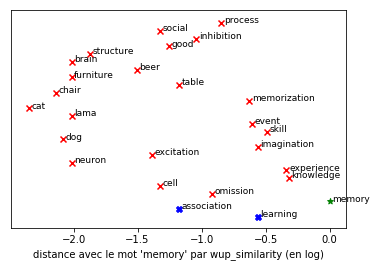

In [34]:
graph_similarity( listOfWords,"memory",['learning', 'association'], similarity = "wup_similarity" )


learning|memory : -0.15415067982725836
association|memory : -0.06899287148695143


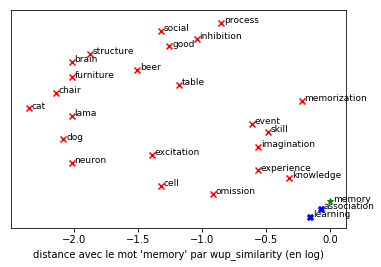

In [35]:
graph_similarity( listOfWords,["memory",2],['learning', ['association',4]], similarity = "wup_similarity" )


Dans ces deux premiers graphiques j'ai comparé tous les mots au mot memory. La seule diffèrence entre ces 2 graphiques et que pour le premier j'ai choisi le premier sens de nos 3 mots cibles alors que le deuxième à été fait à partir du sens le plus approprié pour notre projet.

On constate que la distance entre nos mots cibles n'est pas la même selon le sens choisi (association et learning sont beaucoup plus proches de memory avec leur sens le plus approprié). Il y a donc un réel intéret à bien vérifier qu'on a mis le sens du mot qui correspond le plus avec ce que l'on souhaite dire.

### Comparaison entre nos 3 mots cibles

learning|memory : -0.15415067982725836
association|memory : -0.06899287148695143


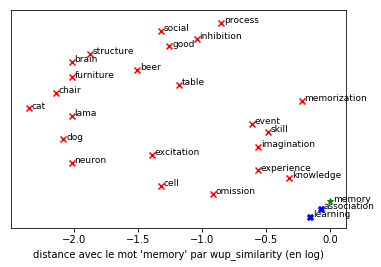

In [44]:
graph_similarity( listOfWords,["memory",2],['learning', ['association',4]], similarity = "wup_similarity" )


memory|learning : -0.15415067982725836
association|learning : -0.2231435513142097


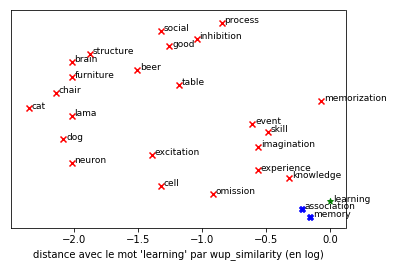

In [36]:
graph_similarity(listOfWords,"learning",[["memory",2], ['association',4]] , similarity = "wup_similarity" )


learning|association : -0.2231435513142097
memory|association : -0.06899287148695143


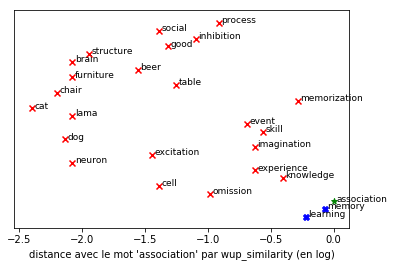

In [37]:
graph_similarity(listOfWords,['association',4],['learning', ["memory",2]] , similarity = "wup_similarity" )

Comme nous l'avions déjà remarqué nos 3 mots sont très similaires avec la wup_similarity et nous pouvons constater que même comparés à tout un ensemble de mots qui leur sont plus ou moins reliés sémantiquement ce sont ces 3 mots là qui sont les plus proches à chaque fois (à l'exception de 'memorization' qui est plus proches de learning que nos 2 autres mots cibles).

On continu également de constater que la similarité memory|association est plus grande que celle de memory|learning qui est elle même plus grande que celle de learning|association.

### Comparaison avec 'cat' et 'memorization'

learning|cat : -2.3513752571634776
memory|cat : -2.3513752571634776
association|cat : -2.3978952727983707


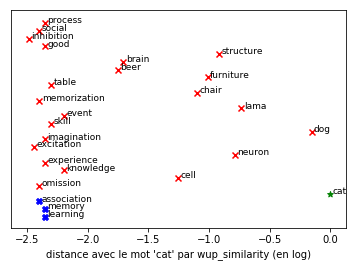

In [46]:
listOfWords = ["omission","cell","knowledge", "experience","neuron","excitation","imagination","dog", "skill", "event","lama","memorization","chair","table","furniture","beer","brain","structure","good","inhibition", "social", "process"]
graph_similarity(listOfWords ,"cat",['learning', ["memory",2], ['association',4]] , similarity = "wup_similarity" )

learning|memorization : -0.06899287148695143
memory|memorization : -0.2231435513142097
association|memorization : -0.2876820724517809


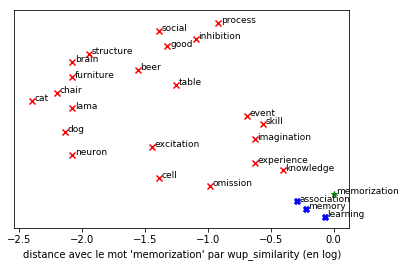

In [41]:
listOfWords = ["omission","cell","knowledge", "experience","neuron","excitation","imagination","dog", "skill", "event","lama","cat","chair","table","furniture","beer","brain","structure","good","inhibition", "social", "process"]
graph_similarity(listOfWords,"memorization",['learning', ["memory",2], ['association',4]] , similarity = "wup_similarity" )

Heureusement notre hypothèse est confirmée et nos 3 mots cibles ont des sens bien plus similaire par rapport à 'memorization' que par rapport à 'cat' qui est plus proche des mots comme 'dog' et 'lama' ce qui semble logique.

# Conclusion

D'après la wup_similarity de wordnet, les sens des mots Learning, Association et Memory semblent bien être très proches. Memory et Association auraient des sens plus proches que Memory et Learning qui auraient des sens plus proches que Learning et Association. Ces mots sont relativement proches et sont également proches d'autres mots comme Memorization et sont plus éloignés des mots comme Cat. Cependant Wordnet est un modèle symbolique, il serait intéressant de comparer ces résultats aux résultats de recherches avec un modèle distributionel comme on peut le faire avec l'outil Mangoes.